## [Experiments] Uncertainty Sampling with a 1D Gaussian Process as model

First, we define a prior probablility for a model.
The GaussianRegressor approximates this model using an optimization method (probably similar to EM) for a given data input.
The resulting model has a mean and a certainty.
We use these to determine the next data point that should be labeled and critizise the data set.

In [1]:
%matplotlib inline
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)
import math
import numpy as np
from matplotlib import pyplot as plt

In [2]:
size = 100
kernel = 1.0 * RBF(length_scale=1.0,length_scale_bounds=(1e-1,10.0))
gp = GaussianProcessRegressor(kernel=kernel)

Text(0.5,1,'Prior (kernel:  1**2 * RBF(length_scale=1))')

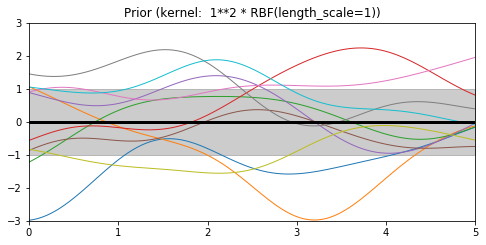

In [3]:
# plot prior probability of model
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
X_ = np.linspace(0, 5, size)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                 alpha=0.2, color='k')
y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1)
plt.xlim(0, 5)
plt.ylim(-3, 3)
plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

In [4]:
# Generate data and fit GP
rng = np.random.RandomState(4)
X = np.linspace(0, 5, 100)[:, np.newaxis]
y = np.sin((X[:, 0] - 2.5) ** 2)

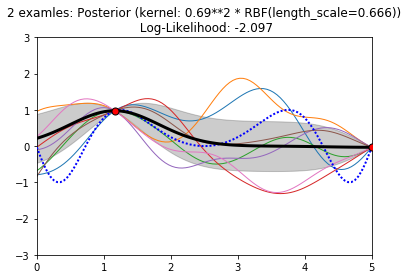

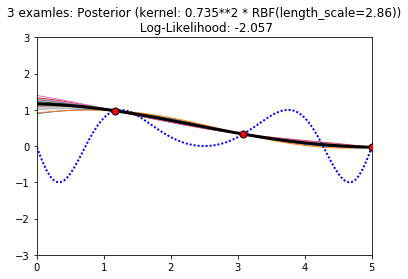

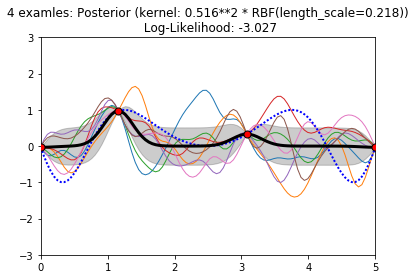

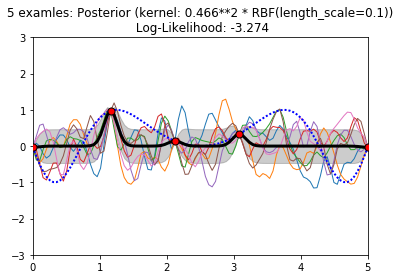

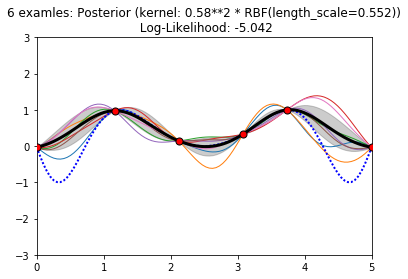

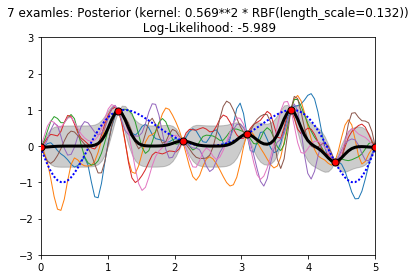

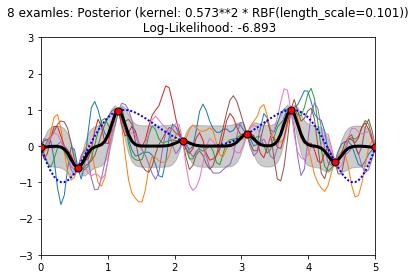

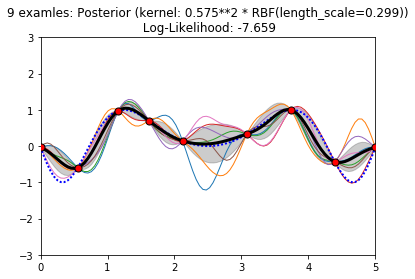

In [5]:
budget = 10
requested_X = []
requested_y = []

# init model with random data point
start = np.random.choice(np.arange(size))
requested_X.append(X[start])
requested_y.append(y[start])
gp.fit(requested_X, requested_y)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)

for index in range(2,10):
    max_std = np.unravel_index(np.argmax(y_std, axis=None), y_std.shape)
    requested_X.append(X[max_std])
    requested_y.append(y[max_std])
    
    gp.fit(requested_X, requested_y)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')

    y_samples = gp.sample_y(X_[:, np.newaxis], 7)
    plt.plot(X_, y_samples, lw=1)
    plt.plot(X_, y, lw=2,color='b',zorder =8, dashes=[1,1],)
    plt.scatter(requested_X, requested_y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("%s examles: Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (index, gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.show()

Note how the new data point we aquired after 9 iterations completely changed the certainty about our model.